In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys
print(sys.version)

3.7.1 | packaged by conda-forge | (default, Nov 13 2018, 09:50:42) 
[Clang 9.0.0 (clang-900.0.37)]


In [5]:
orig_df = pd.read_excel('customerlist.xlsx', sheet_name='usethis')
orig_df.head()

,1,2,3,4,5,6,7,8,9,10,...,190,191,192,193,194,195,196,197,198,199
2014-01-01,2000,2000,2000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-01,2000,2000,1960.00000,2000.0,2000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-01,2000,2000,1920.80000,2000.0,2000.0,2000.0,2000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-01,2000,2000,1882.38400,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-01,2000,2000,1844.73632,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,1960.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
orig_df.reset_index(inplace=True)
orig_df.drop('index',axis = 1,inplace=True)
orig_df.head()

,1,2,3,4,5,6,7,8,9,10,...,190,191,192,193,194,195,196,197,198,199
0,2000,2000,2000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2000,1960.00000,2000.0,2000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,2000,1920.80000,2000.0,2000.0,2000.0,2000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,2000,1882.38400,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,2000,1844.73632,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,1960.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
orig_df.shape

(48, 199)

In [8]:
# create the list of Customer IDs for dataframe
x = [int(customer) for customer in range(1,200) for date in range(1,49)]

#Create the date range for all the revenue data and customers
dates_list = []
date_rng = pd.date_range(start='1/31/2014', end='12/31/2017', freq='M')
for i in range(199):
    for j in date_rng:
        dates_list.append(j)

# Get the revenues from the Excel spreadsheet imported as dataframe named orig_df
rev_list = []
for customer in range(0,199):
    for rev in range(0,48):
        rev_list.append(orig_df.iloc[rev,customer])
        
# create the dataframe with the data we will work from:
rawdata = {'CustomerID': x, 'Time': dates_list, 'Revenue': rev_list}
df_data = pd.DataFrame(rawdata, columns = ['CustomerID','Time','Revenue'])
df_data.head()

,CustomerID,Time,Revenue
0,1,2014-01-31,2000.0
1,1,2014-02-28,2000.0
2,1,2014-03-31,2000.0
3,1,2014-04-30,2000.0
4,1,2014-05-31,2000.0


In [9]:
# Given our dataset has nan values, we want to fill them with 0 for proper calculations
df_data = df_data.fillna(0)
df_data.describe()

,CustomerID,Revenue
count,9552.000000,9552.000000
mean,100.000000,750.663612
std,57.448634,1063.002117
min,1.000000,0.000000
25%,50.000000,0.000000
50%,100.000000,0.000000
75%,150.000000,2000.000000
max,199.000000,3456.000000


In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9552 entries, 0 to 9551
Data columns (total 3 columns):
CustomerID    9552 non-null int64
Time          9552 non-null datetime64[ns]
Revenue       9552 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 224.0 KB


In [11]:
# Filter out all records where Revenue is 0
df = df_data.query('Revenue > 0')
df.describe()

,CustomerID,Revenue
count,3350.000000,3350.000000
mean,56.102090,2140.399647
std,44.550243,497.079757
min,1.000000,822.199723
25%,20.000000,2000.000000
50%,45.000000,2000.000000
75%,83.000000,2400.000000
max,199.000000,3456.000000


In [12]:
# Create a table with revenue and customer count by month
# Grouped by Time (month) with CustomerID count and Revenue sum
g = df.groupby(['Time']).agg({'CustomerID':'count','Revenue':'sum'}).reset_index()
g.head()

,Time,CustomerID,Revenue
0,2014-01-31,3,6000.00000
1,2014-02-28,5,9960.00000
2,2014-03-31,7,13920.80000
3,2014-04-30,11,21882.38400
4,2014-05-31,15,29764.73632


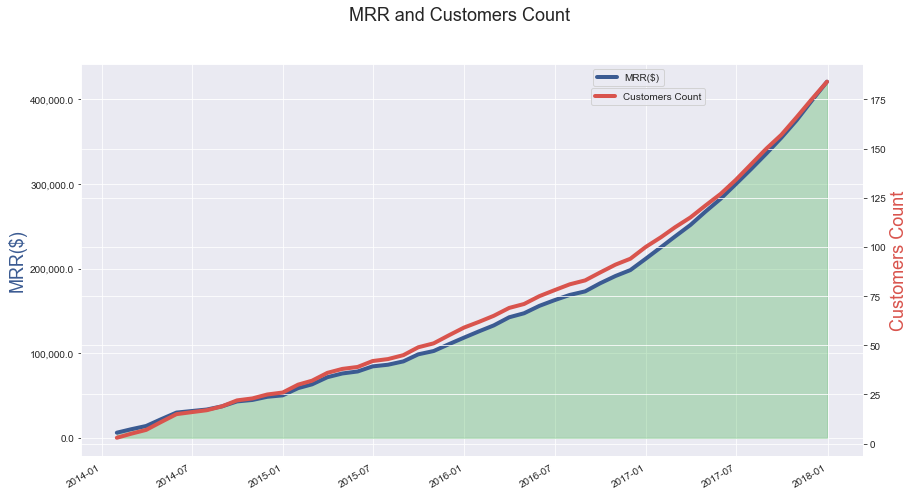

In [13]:
# code below modefied from this excellent post: https://assemblinganalytics.com/post/cohort-analysis-python/
# We want to build a line chart showing MRR growth and customer count growth

def dualAxis2Lines(timeAxis, y, z, title, axis_1_label, axis_2_label):
    sns.set_style("darkgrid",{"xtick.major.size": 4, "ytick.major.size": 4})
    colors =[sns.xkcd_rgb["denim blue"],sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"]]
    fig, ax = plt.subplots()
    fig.set_size_inches(14,8)

    ax.plot(timeAxis,y, color=colors[0], linewidth=4, label=axis_1_label)
    ax.legend(loc='upper center',bbox_to_anchor=(0.7, 1))
    ax.fill_between(timeAxis.dt.to_pydatetime(), y, color=colors[1], alpha=0.3) #Create an area chart
    ax.set_ylabel(axis_1_label, fontsize=18, color=colors[0])
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,}'.format(x) for x in vals])

    ax2 = ax.twinx()
    ax2.plot(timeAxis,z, color=colors[2], linewidth=4, label=axis_2_label)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.725, .95))
    ax2.set_ylabel(axis_2_label, fontsize=18, color=colors[2])

    fig.autofmt_xdate()
    fig.suptitle(title, fontsize=18)
   # fig.savefig('MRR.png')

title = 'MRR and Customers Count'
axis_1_label = 'MRR($)'
axis_2_label = 'Customers Count'
dualAxis2Lines(g["Time"], g["Revenue"], g["CustomerID"], title, axis_1_label, axis_2_label)

In [14]:
df.head()

,CustomerID,Time,Revenue
0,1,2014-01-31,2000.0
1,1,2014-02-28,2000.0
2,1,2014-03-31,2000.0
3,1,2014-04-30,2000.0
4,1,2014-05-31,2000.0


In [15]:
# Create an OrderPeriod column to indicate the month the revenues were billed
df['OrderPeriod'] = df['Time'].apply(lambda x: x.strftime('%Y-%m'))
df.head()

/Users/austinconner/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CustomerID,Time,Revenue,OrderPeriod
0,1,2014-01-31,2000.0,2014-01
1,1,2014-02-28,2000.0,2014-02
2,1,2014-03-31,2000.0,2014-03
3,1,2014-04-30,2000.0,2014-04
4,1,2014-05-31,2000.0,2014-05


In [16]:
# Determine the user's cohort group
df.set_index('CustomerID',inplace=True)
df['CohortGroup'] = df.groupby(level=0)['Time'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)
df.head()

/Users/austinconner/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CustomerID,Time,Revenue,OrderPeriod,CohortGroup
0,1,2014-01-31,2000.0,2014-01,2014-01
1,1,2014-02-28,2000.0,2014-02,2014-01
2,1,2014-03-31,2000.0,2014-03,2014-01
3,1,2014-04-30,2000.0,2014-04,2014-01
4,1,2014-05-31,2000.0,2014-05,2014-01


In [17]:
# Determine the user's cohort group YEAR
df.set_index('CustomerID',inplace=True)
df['CohortYear'] = df.groupby(level=0)['Time'].min().apply(lambda x: x.strftime('%Y'))
df.reset_index(inplace=True)
df.head()

/Users/austinconner/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CustomerID,Time,Revenue,OrderPeriod,CohortGroup,CohortYear
0,1,2014-01-31,2000.0,2014-01,2014-01,2014
1,1,2014-02-28,2000.0,2014-02,2014-01,2014
2,1,2014-03-31,2000.0,2014-03,2014-01,2014
3,1,2014-04-30,2000.0,2014-04,2014-01,2014
4,1,2014-05-31,2000.0,2014-05,2014-01,2014


In [18]:
# Grab the December months of Revenue data to calc the ARR totals for each cohort year
df_dec = df[(df['Time']== '2014-12-31') | (df['Time']== '2015-12-31') | (df['Time']== '2016-12-31') | (df['Time']== '2017-12-31')]
df_dec = df_dec[['Time','CohortYear','Revenue']]
df_dec = df_dec.reset_index(drop=True)
df_dec.head()

,Time,CohortYear,Revenue
0,2014-12-31,2014,2000.0
1,2015-12-31,2014,2400.0
2,2016-12-31,2014,2880.0
3,2017-12-31,2014,3456.0
4,2014-12-31,2014,2000.0


In [19]:
#  Split, Apply, Combine
dec_mrr = df_dec.groupby(['Time','CohortYear']).agg({'Revenue': np.sum})
dec_mrr.rename(columns = {'Revenue': 'MRR'},inplace=True)
# create an ARR column
dec_mrr['ARR'] = dec_mrr['MRR'] * 12
dec_mrr

MRR           ARR
Time       CohortYear                             
2014-12-31 2014         50164.137245  6.019696e+05
2015-12-31 2014         54314.835373  6.517780e+05
           2015         64063.434966  7.687612e+05
2016-12-31 2014         60561.997199  7.267440e+05
           2015         71035.812611  8.524298e+05
           2016         80104.247566  9.612510e+05
2017-12-31 2014         64778.771693  7.773453e+05
           2015         75148.912548  9.017870e+05
           2016         83101.501205  9.972180e+05
           2017        198000.000000  2.376000e+06

In [20]:
# change MRR and ARR to integers for bar chart purposes
dec_mrr.MRR = dec_mrr.MRR.astype(int)
dec_mrr.ARR = dec_mrr.ARR.astype(int)
dec_mrr

MRR      ARR
Time       CohortYear                 
2014-12-31 2014         50164   601969
2015-12-31 2014         54314   651778
           2015         64063   768761
2016-12-31 2014         60561   726743
           2015         71035   852429
           2016         80104   961250
2017-12-31 2014         64778   777345
           2015         75148   901786
           2016         83101   997218
           2017        198000  2376000

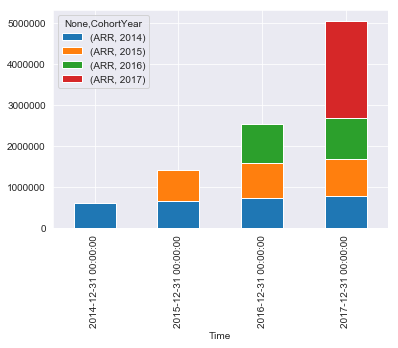

In [28]:
# Quickly use Pandas Built-in Data Vizualization to view ARR growth by cohort
g_stack = dec_mrr.drop('MRR', axis=1)
g_stack = g_stack.unstack()
g_stack.plot.bar(stacked=True);

In [43]:
# looking at the data one more time
g_stack = g_stack.fillna(0)
g_stack

ARR                               
CohortYear      2014      2015      2016       2017
Time                                               
2014-12-31  601969.0       0.0       0.0        0.0
2015-12-31  651778.0  768761.0       0.0        0.0
2016-12-31  726743.0  852429.0  961250.0        0.0
2017-12-31  777345.0  901786.0  997218.0  2376000.0

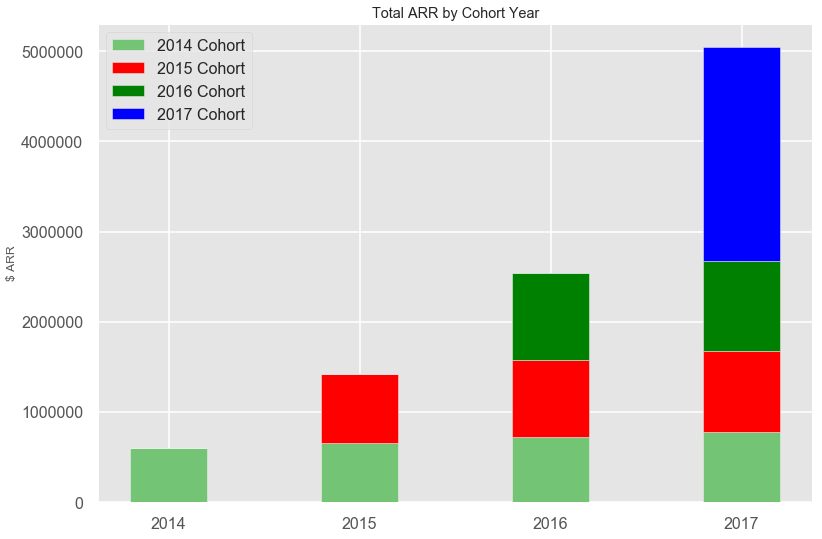

In [57]:
# lets make the chart look a bit better
import matplotlib
matplotlib.style.use('ggplot')
color = ['r','g','b','#74C476']
N = 4
x_loc = np.arange(N)
width = 0.4
data1 = g_stack['ARR','2014']
data2 = g_stack['ARR','2015']
data3 = g_stack['ARR','2016']
data4 = g_stack['ARR','2017']

cht_yr_14 = plt.bar(x_loc, data1, width, color = color[3])
cht_yr_15 = plt.bar(x_loc, data2, width, bottom = data1, color = color[0])
cht_yr_16 = plt.bar(x_loc, data3, width, bottom = data1 + data2, color = color[1])
cht_yr_17 = plt.bar(x_loc, data4, width, bottom = data1 + data2 + data3, color = color[2])

plt.xticks(x_loc, ('2014','2015','2016','2017'))
plt.ylabel('$ ARR')
plt.title('Total ARR by Cohort Year')
plt.legend((cht_yr_14[0], cht_yr_15[0], cht_yr_16[0],cht_yr_17[0]),
           ('2014 Cohort', '2015 Cohort','2016 Cohort','2017 Cohort'))

plt.show()

With a stacked bar chart, it is easy to see the growth that occurs within each cohort group.  In this example data, during 2017, the 2017 cohort provided most of the growth while not much expansion occurs for the other years.

Next, I am going to use a box plot and violin chart to examine the monthly billings for each customer and how that differs by cohort year.

In [58]:
# check out the dataframe we plan to use for the next data visualization
df_dec.head()

,Time,CohortYear,Revenue
0,2014-12-31,2014,2000.0
1,2015-12-31,2014,2400.0
2,2016-12-31,2014,2880.0
3,2017-12-31,2014,3456.0
4,2014-12-31,2014,2000.0


/Users/austinconner/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


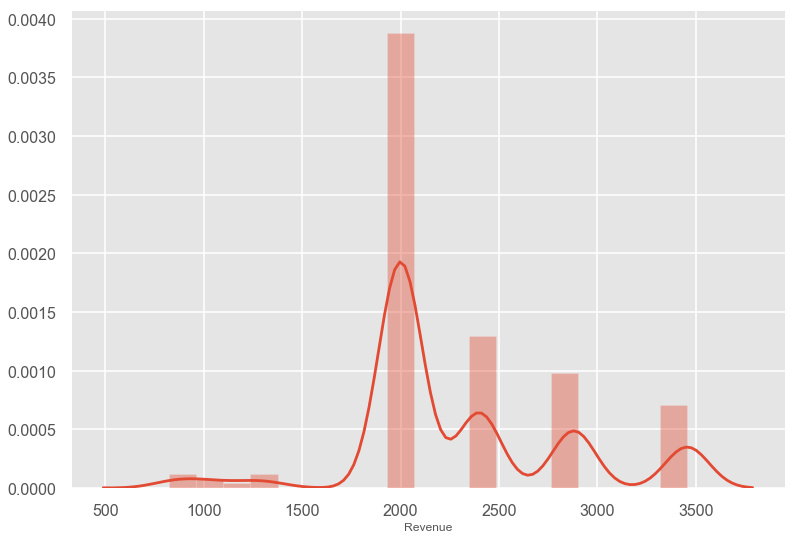

In [59]:
# we are only interested in Dec 2017 data so lets grab that and create some charts
df_pricing = df_dec[df_dec['Time'] == '2017-12-31']
sns.distplot(df_pricing['Revenue'])

It is easy to see that the most common monthly price is $2000. How does pricing differ by year?

/Users/austinconner/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


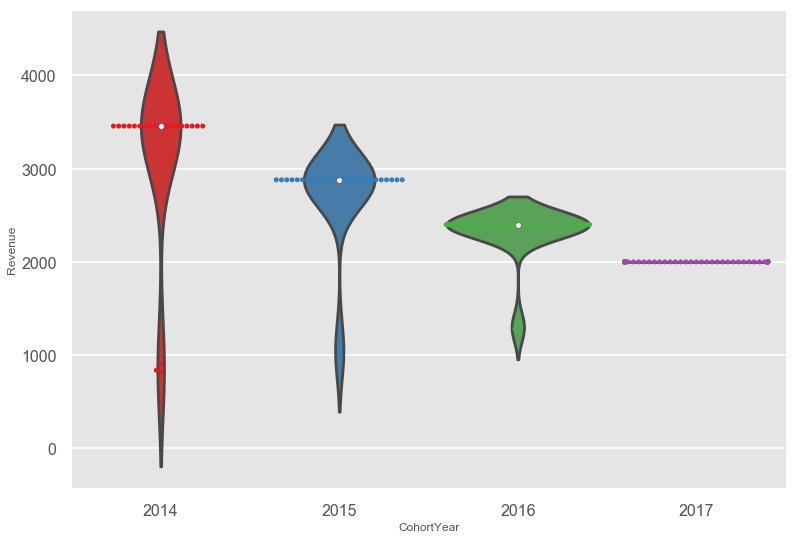

In [66]:
sns.swarmplot(x = 'CohortYear', y='Revenue',data=df_pricing, palette = 'Set1')
sns.violinplot(x = 'CohortYear', y='Revenue',data=df_pricing, palette = 'Set1')

Combining the swarm and violin plots allows us to see that the 2014 cohort has the highest average pricing but with a few outliers well-below the average. These could be legacy contracts on grandfathered pricing.  2017 skews the overall pricing data with all customers paying $2000 per month.

Now lets look at # of customers at the end of 2017. Is the 2017 Cohort ARR larger because of average ACV (annual contract value) or is it because it has more customers?

In [70]:
df_dec_cust = df[df['Time']== '2017-12-31']
df_dec_cust = df_dec_cust[['CohortYear','Time','CustomerID']]
df_dec_cust = df_dec_cust.reset_index(drop=True)
df_dec_cust.head()

,CohortYear,Time,CustomerID
0,2014,2017-12-31,1
1,2014,2017-12-31,2
2,2014,2017-12-31,4
3,2014,2017-12-31,5
4,2014,2017-12-31,6


In [71]:
#  Split, Apply, Combine
df_dec_cust = df_dec_cust.groupby(['CohortYear']).agg({'CustomerID': pd.Series.nunique})
df_dec_cust.rename(columns = {'CustomerID': 'TotalCustomers'},inplace=True)

df_dec_cust

,TotalCustomers
CohortYear,
2014,21
2015,28
2016,36
2017,99


In [74]:
df_dec_cust.reset_index(inplace=True)

[Text(0,0.5,''), (0, 100), Text(0.5,0,'# of Customers')]

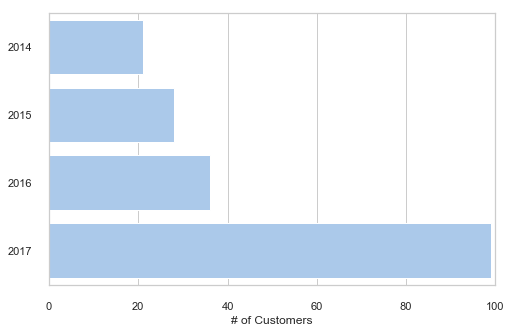

In [80]:
# Seaborn summary chart
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,5))
# Plot the total purchases
sns.set_color_codes("pastel")
sns.barplot(x="TotalCustomers", y="CohortYear", data=df_dec_cust, 
            label="# of Customers", color="b",orient='h',
            order=df_dec_cust['CohortYear'])

# Add a legend and informative axis label
ax.set(xlim=(0, 100), ylabel="", xlabel="# of Customers")


This bar chart confirms what we could extrapolate from the others ~ 2017 cohort had the most customers.

# Customer and Revenue Retention by Cohort Grouping

In [87]:
df.head()

,CustomerID,Time,Revenue,OrderPeriod,CohortGroup
0,1,2014-01-31,2000.0,2014-01,2014-01
1,1,2014-02-28,2000.0,2014-02,2014-01
2,1,2014-03-31,2000.0,2014-03,2014-01
3,1,2014-04-30,2000.0,2014-04,2014-01
4,1,2014-05-31,2000.0,2014-05,2014-01


In [88]:
# 1st look at Customer retention
grouped = df.groupby(['CohortGroup','OrderPeriod'])
# count the unique users, orders and total revenue per Group + Period
cohorts = grouped.agg({'CustomerID': pd.Series.nunique,
                      'Revenue': np.sum})
# make column names easier to identify
cohorts.rename(columns={'CustomerID':'TotalCustomers',
                       'Revenue': 'MRR'}, inplace=True)
cohorts.head()

TotalCustomers         MRR
CohortGroup OrderPeriod                            
2014-01     2014-01                   3  6000.00000
            2014-02                   3  5960.00000
            2014-03                   3  5920.80000
            2014-04                   3  5882.38400
            2014-05                   3  5844.73632

In [89]:
# Label the CohortPeriod for each CohortGroup
#index each cohort to their first purchase month
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) +1
    return df
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalCustomers         MRR  CohortPeriod
CohortGroup OrderPeriod                                          
2014-01     2014-01                   3  6000.00000             1
            2014-02                   3  5960.00000             2
            2014-03                   3  5920.80000             3
            2014-04                   3  5882.38400             4
            2014-05                   3  5844.73632             5

In [93]:
# MAKE SURE THINGS ARE WORKING - if this throws an error, go back and correct where necessary
x = df[(df.CohortGroup=='2016-01') & (df.OrderPeriod == '2016-01')]
y = cohorts.loc['2016-01', '2016-01']
#print(test_x)
#print(test_y)
assert(x['CustomerID'].nunique() == y['TotalCustomers'])
assert(x['Revenue'].sum().round(2) == y['MRR'].round(2))

In [94]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup','CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalCustomers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2014-01    3
2014-02    2
2014-03    2
2014-04    4
2014-05    4
Name: TotalCustomers, dtype: int64

In [95]:
# Divide TotalUsers values in cohorts by cohort_group_size.
# UNSTACK on our cohorts DataFrame to create a matrix where each column represents a CohortGroup and each row
# is a CohortPeriod corresponding to that group
cohorts['TotalCustomers'].head()

CohortGroup  CohortPeriod
2014-01      1               3
             2               3
             3               3
             4               3
             5               3
Name: TotalCustomers, dtype: int64

In [96]:
# unstack the CohortGroup level from the index
cohorts['TotalCustomers'].unstack(0).head()

CohortGroup,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,3.0,2.0,2.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,...,6.0,8.0,8.0,8.0,9.0,9.0,8.0,10.0,11.0,10.0
2,3.0,2.0,2.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,...,6.0,8.0,8.0,8.0,9.0,9.0,8.0,10.0,11.0,NaN
3,3.0,2.0,2.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,...,6.0,8.0,8.0,8.0,9.0,9.0,8.0,10.0,NaN,NaN
4,3.0,2.0,2.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,...,6.0,8.0,8.0,8.0,9.0,9.0,8.0,NaN,NaN,NaN
5,3.0,2.0,2.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,...,6.0,8.0,8.0,8.0,9.0,9.0,NaN,NaN,NaN,NaN


In [97]:
# divide each column by the corresponding cohort size to get a user retention %
user_retention = cohorts['TotalCustomers'].unstack(0).divide(cohort_group_size,axis=1)
user_retention.head()

CohortGroup,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


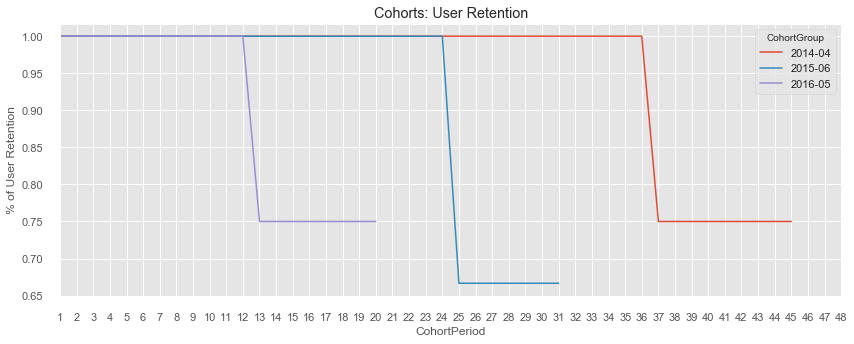

In [146]:
# pick a few cohorts to plot to see differences or similarities
matplotlib.style.use('ggplot')
user_retention[['2014-04', '2015-06', '2016-05']].plot(figsize=(14,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 48.1, 1))
plt.xlim(1, 48)
plt.ylabel('% of User Retention');

This chart is interesting because it shows that each one of these cohorts has had churn.

In [130]:
# grab a subset of user_retention dataframe so heatmap doesn't contain too many datapoints
user_ret_subset = user_retention.iloc[:25,24:36]
user_ret_subset.head(2)

CohortGroup,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
CohortPeriod,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


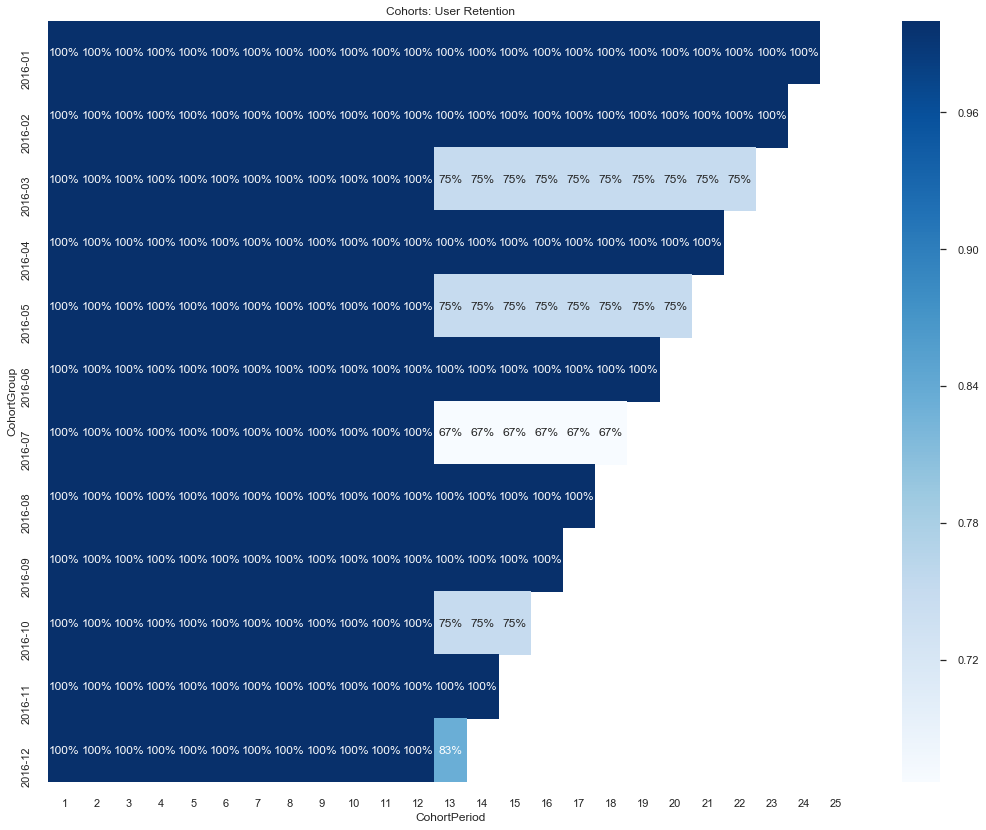

In [133]:
sns.set(style='white')
plt.figure(figsize=(18, 14))
plt.title('Cohorts: User Retention')
sns.heatmap(user_ret_subset.T, mask=user_ret_subset.T.isnull(), annot=True, fmt='.0%',cmap="Blues");

Looking at the 2016 cohort, customer retention is quite high. Only customers from the March, May, July, October and December months have churned. 

Lets now switch over to revenue retention.

In [135]:
cohorts.head()

OrderPeriod  TotalCustomers         MRR
CohortGroup CohortPeriod                                        
2014-01     1                2014-01               3  6000.00000
            2                2014-02               3  5960.00000
            3                2014-03               3  5920.80000
            4                2014-04               3  5882.38400
            5                2014-05               3  5844.73632

In [136]:
# create a Series holding the total MRR of each CohortGroup
cohort_group_MRR = cohorts['MRR'].groupby(level=0).first()
cohort_group_MRR.head()
# Divide TotalUsers values in cohorts by cohort_group_size.
# UNSTACK on our cohorts DataFrame to create a matrix where each column represents a CohortGroup and each row
# is a CohortPeriod corresponding to that group
cohorts['MRR'].head()
# unstack the CohortGroup level from the index
cohorts['MRR'].unstack(0).head()
# divide each column by the corresponding cohort size to get a user retention %
rev_retention = cohorts['MRR'].unstack(0).divide(cohort_group_MRR,axis=1)
rev_retention.head()

CohortGroup,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.993333,1.0,1.0,0.990000,0.990000,1.0,1.0,0.990000,0.993333,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,0.986800,1.0,1.0,0.980200,0.980200,1.0,1.0,0.980200,0.986800,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.980397,1.0,1.0,0.970596,0.970596,1.0,1.0,0.970596,0.980397,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
5,0.974123,1.0,1.0,0.961184,0.961184,1.0,1.0,0.961184,0.974123,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [137]:
rev_retention.tail()

CohortGroup,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
44,1.152,1.728,1.728,0.968872,0.968872,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,1.152,1.728,1.728,0.966775,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,1.152,1.728,1.728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,1.152,1.728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,1.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


IF REVENUE RETENTION IS > 100% THEN THERE IS EXPANSION WITHIN THAT COHORT GROUP

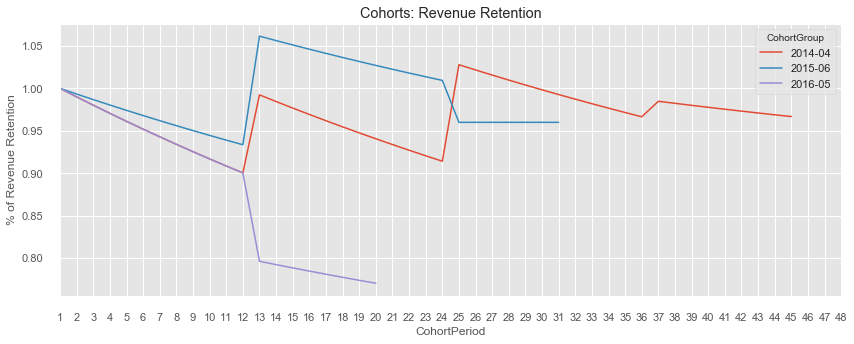

In [147]:
# pick a few cohorts to plot to see differences or similarities
matplotlib.style.use('ggplot')
rev_retention[['2014-04', '2015-06', '2016-05']].plot(figsize=(14,5))
plt.title('Cohorts: Revenue Retention')
plt.xticks(np.arange(1, 48.1, 1))
plt.xlim(1, 48)
plt.ylabel('% of Revenue Retention');

It appears that the May 2016 cohort has decreased in revenue while the others may have had expansion offsetting churned revenue.

In [139]:
# grab the same subset from user retention example so heatmap doesn't contain too many datapoints
rev_ret_subset = rev_retention.iloc[:25,24:36]
rev_ret_subset.head(2)

CohortGroup,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
CohortPeriod,,,,,,,,,,,,
1,1.000000,1.000000,1.000,1.0,1.00,1.0,1.000000,1.0,1.0,1.000,1.0,1.000000
2,0.993333,0.993333,0.995,1.0,0.99,1.0,0.993333,1.0,1.0,0.995,1.0,0.996667


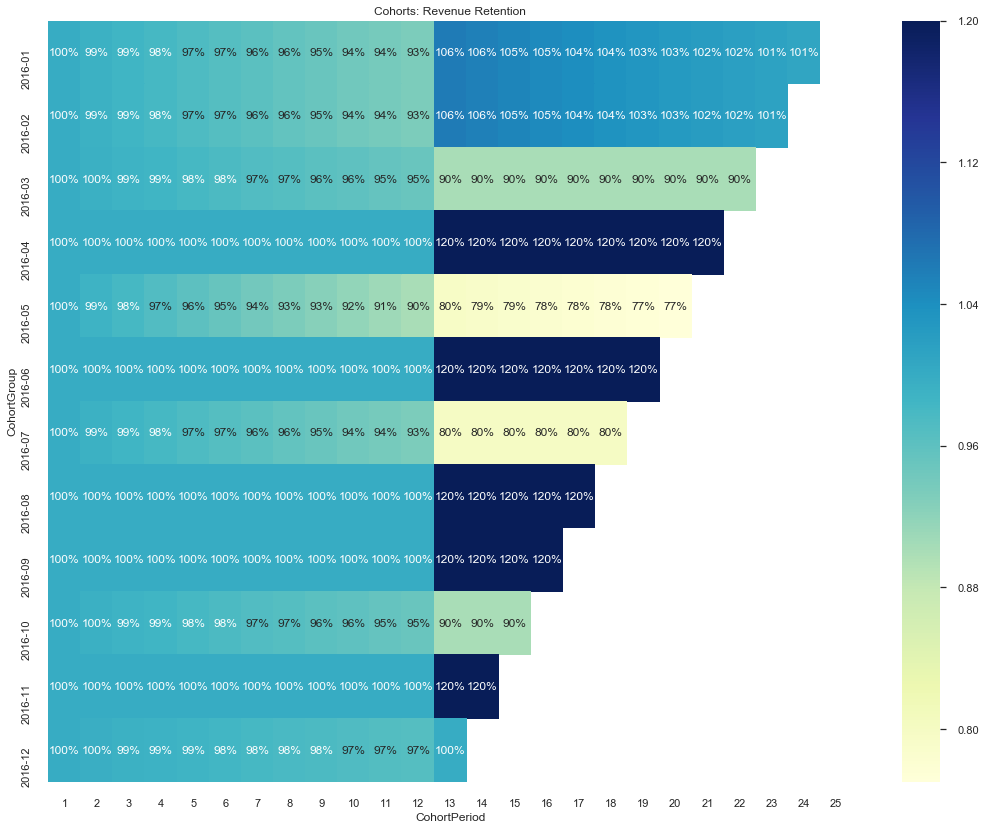

In [144]:
sns.set(style='white')
plt.figure(figsize=(18, 14))
plt.title('Cohorts: Revenue Retention')
sns.heatmap(rev_ret_subset.T, mask=rev_ret_subset.T.isnull(), annot=True, fmt='.0%',cmap="YlGnBu");

Interesting. The revenue retention visualization really provides more information about the 2016 customer cohort. All 12 months of cohort groups have had some churn or expansion. I would want to follow-up and figure out how customer success or onboarding (or account management) contributed to the April, June, August, September and November cohort expansion and bring those best practices to the rest of the customer base. Conversely, are there any lessons learned from the May cohort and can we turn these customers' usage around.